# Programa de la solución de las trayectorias cuánticas para el sistema de 3 niveles.
## Distribución de periodos brillantes y obscuros 
## Distrubución de tiempos de espera
## Distribución de conteo de fotones 

## Figura del proyecto


<img src="3LAkev.png" alt="a" class="bg-primary mb-1" width="400px">


In [2]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *


### La funcion basis es para el número de estados de Fock en el espacio de Hilbert. Si es una lista, entonces el objeto resultante será un producto tensorial  sobre espacios con esas dimensiones.


In [3]:
NF=3
Kg = basis(NF,2)
Ka = basis(NF,1)
Ke = basis(NF,0)

# Estado base
psi0 = Kg 

### Para describir los estados de sistemas cuánticos multipartitos (como dos qubits acoplados, un qubit acoplado a un oscilador, etc.) necesitamos expandir el espacio de Hilbert tomando el producto tensorial de los vectores de estado para cada uno de los componentes del sistema. De manera similar, los operadores que actúan sobre los vectores de estado en el espacio de Hilbert combinado (que describe el sistema acoplado) se forman tomando el producto tensorial de los operadores individuales.

In [4]:
Aaa = Ka*Ka.dag()
Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Aag = Ka*Kg.dag()
Aea = Ke*Ka.dag()
Aae = Ka*Ke.dag()
Aga = Kg*Ka.dag()
Age = Kg*Ke.dag()

#Valores esperados
ket_a = Aaa #Definiendo los valores esperados con la diagonal principal
ket_e = Aee
ket_g = Agg

expect_values = [Aaa,
Aee,
Agg] #Los valores esperados se ponen en forma de lista, no se si importe su orden


### Parametros del experimento. 

In [5]:
Omega = 3.5 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.95
deltat=10000
ntraj =500 # Numero de trayectorias 
tlist = np.linspace(0,40,deltat)

#El numero de trayectorias necesarias para ver periodos brillantes y obscuros tiene que ser 1 
#De lo contrario como ensamble no se ve porque en el mismo coinciden periodos brillantes con los obscuros de otros 
#Esta parpadeo es caracteristico de puntos cuanticos, átomos y algunas moleculas 

### Operadores de colapso

In [6]:
# Operadores de colapso
Ceg = np.sqrt(g)*Age 
Cea = np.sqrt(gd)*Aae
Cag = np.sqrt(ga)*Aga
collapse = [Ceg ,Cea, Cag] #Ceg colapso 0, Cea colapso 1, Cag colapso 2


### Hamiltoniano

In [7]:
#Hamiltoniano del sistema, no se le añaden los terminos de los colapsos porque el programa de la solucion de montecarlo
#lo hace en automatico  con la funcion de liuvillian(H)
H = Delta * Aee + 0.5 * Omega * (Aeg + Age)

### Metodo de montecarlo para resolver las trayectorias cuanticas-

In [7]:


MC4000 = mcsolve(H, psi0, tlist, collapse, expect_values, 4000,
             options={'num_cpus': 6})  # Pasar las opciones como diccionario
#La funcion MC para resolver las trayectorias, H es el hamiltoniano, psi0 son las condiciones iniciales.
#tlist es el tiempo con delta t dependiendo de la funcion linspace, collapse los operadores de colapso, expect_values los 
#valores esperados y ntraj el numero de trayectorias.




100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.80s


### Metodo de montecarlo para resolver la eq maestra

In [8]:

MC = mesolve(H, psi0, tlist, collapse, expect_values)

## Poblaciones 

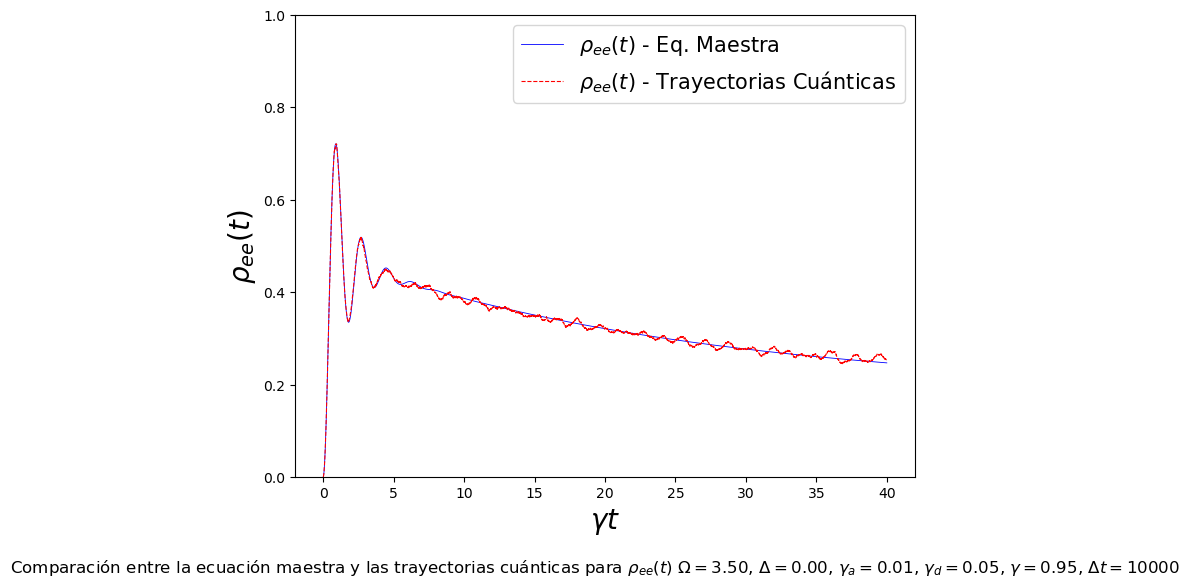

In [15]:
plt.figure(figsize=(8,6))

# Resultados de la ecuación maestra
plt.plot(tlist,MC.expect[1], label=r'$\rho_{ee}(t)$ - Eq. Maestra', linestyle='-', linewidth=0.6, color='blue')

# Resultados de las trayectorias cuánticas (guardados en MC4000)
plt.plot(tlist, MC4000.expect[1], label=r'$\rho_{ee}(t)$ - Trayectorias Cuánticas', linestyle='--', linewidth=0.8, color='red')

# Etiquetas de los ejes
plt.xlabel(r'$\gamma t$', fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$', fontsize=20)

# Límites de los ejes
plt.ylim(0, 1)

# Leyenda
plt.legend(loc=1, prop={'size': 15})

# Texto adicional en la gráfica
plt.figtext(0.5, -0.05, 
            r'Comparación entre la ecuación maestra y las trayectorias cuánticas para $\rho_{ee}(t)$ '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$, $\Delta t = %i$' % (Omega, Delta, ga, gd, g, deltat), 
            ha='center', fontsize=12)

# Guardar la figura
#plt.savefig('Comparacion_EqMaestra_Trayectorias.pdf')

# Mostrar la figura
plt.show()


## 

0.95


Text(0.5, -0.05, 'Evolución temporal de la poblacion del estado exitado de una trayectoria  $\\Omega = 3.50$, $\\Delta = 0.00$, $\\gamma_a = 0.01$, $\\gamma_d = 0.05$, $\\gamma = 0.95$,$\\Delta t = 10000$')

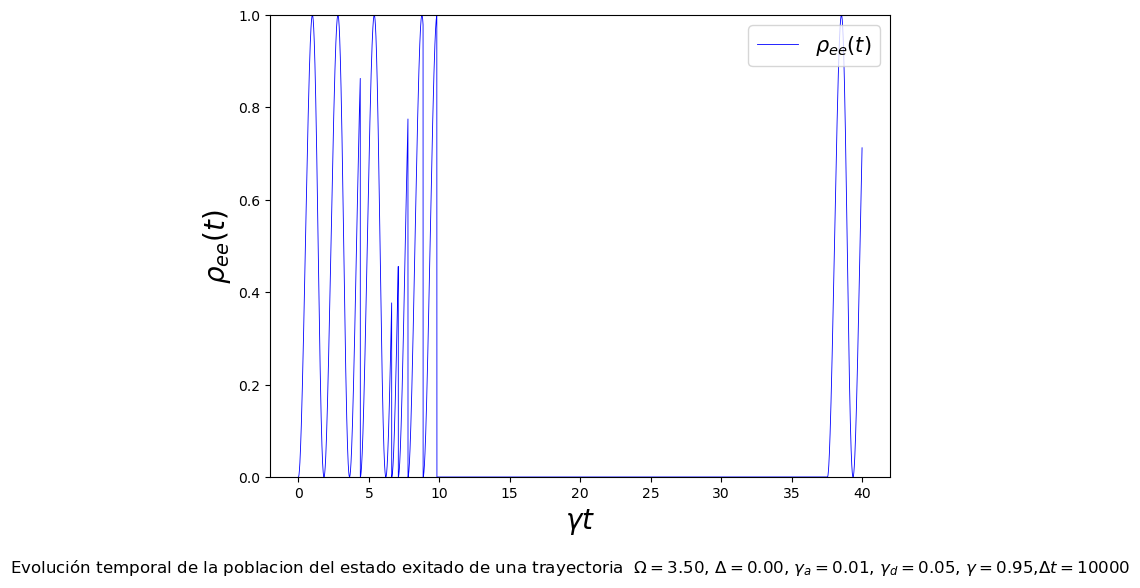

In [59]:
print(g)
plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC1.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC1.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC1.expect[2], label =r'$\rho_{gg}(t)$', linestyle='-',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,200)
plt.ylim(0,1)
plt.legend(loc=1, prop={'size': 15})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de una trayectoria  '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)


Text(0.5, -0.05, 'Evolución temporal de la poblacion del estado exitado de 10 trayectorias $\\Omega = 3.50$, $\\Delta = 0.00$, $\\gamma_a = 0.01$, $\\gamma_d = 0.05$, $\\gamma = 0.95$,$\\Delta t = 10000$')

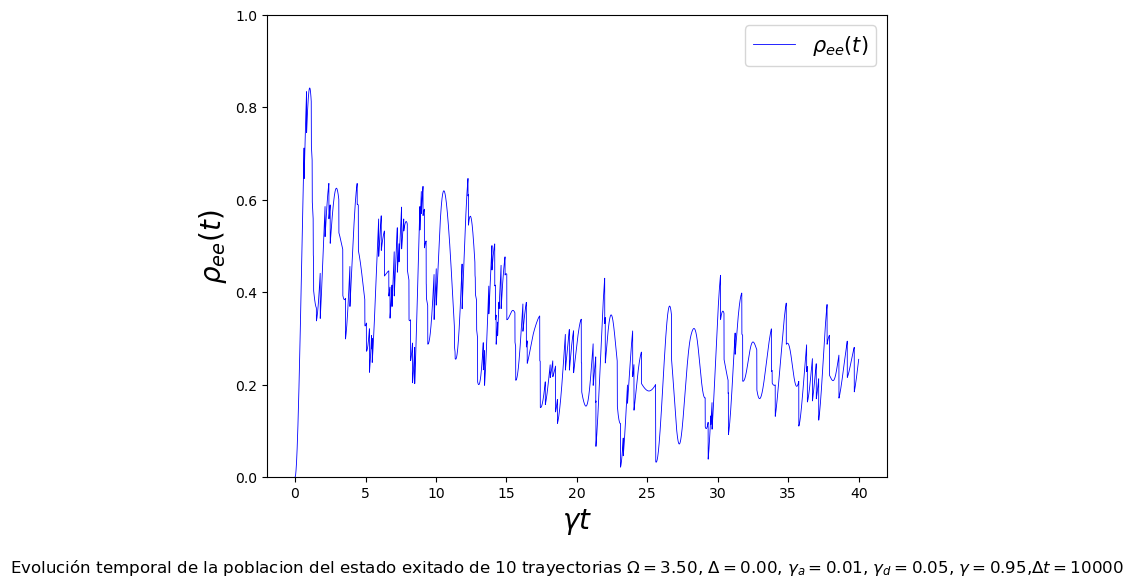

In [64]:
plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC10.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC10.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC10.expect[2], label =r'$\rho_{gg}(t)$', linestyle='-',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,200)
plt.ylim(0,1)
plt.legend(loc=1, prop={'size': 15})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de 10 trayectorias '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)


Text(0.5, -0.05, 'Evolución temporal de la poblacion del estado exitado de 50 trayectorias $\\Omega = 3.50$, $\\Delta = 0.00$, $\\gamma_a = 0.01$, $\\gamma_d = 0.05$, $\\gamma = 0.95$,$\\Delta t = 10000$')

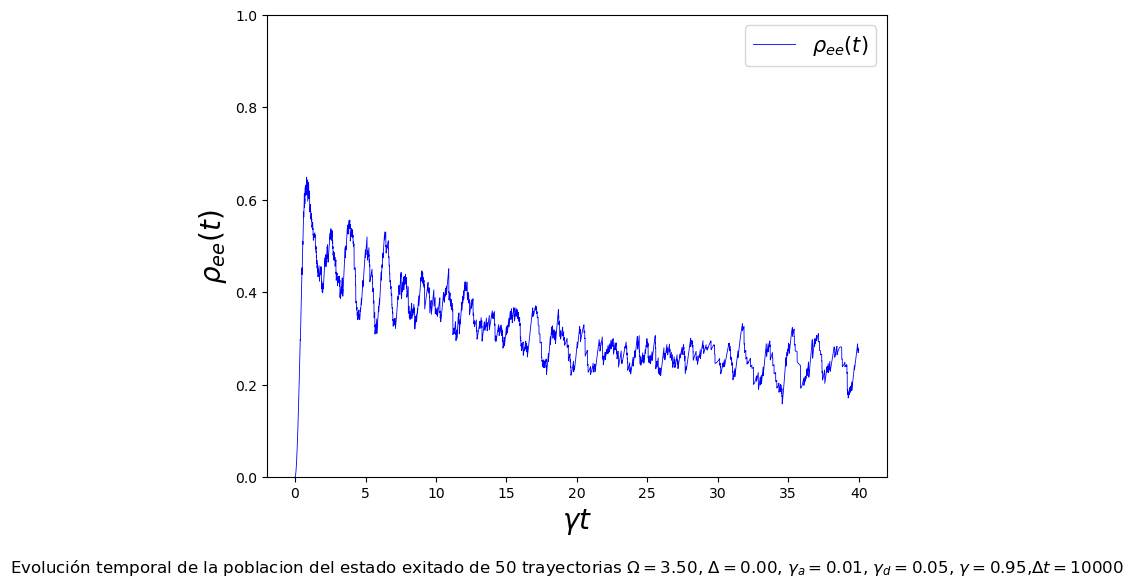

In [66]:
plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC50.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC50.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC50.expect[2], label =r'$\rho_{gg}(t)$', linestyle='-',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,200)
plt.ylim(0,1)
plt.legend(loc=1, prop={'size': 15})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de 50 trayectorias '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)


Text(0.5, -0.05, 'Evolución temporal de la poblacion del estado exitado de 100 trayectorias $\\Omega = 3.50$, $\\Delta = 0.00$, $\\gamma_a = 0.01$, $\\gamma_d = 0.05$, $\\gamma = 0.95$,$\\Delta t = 10000$')

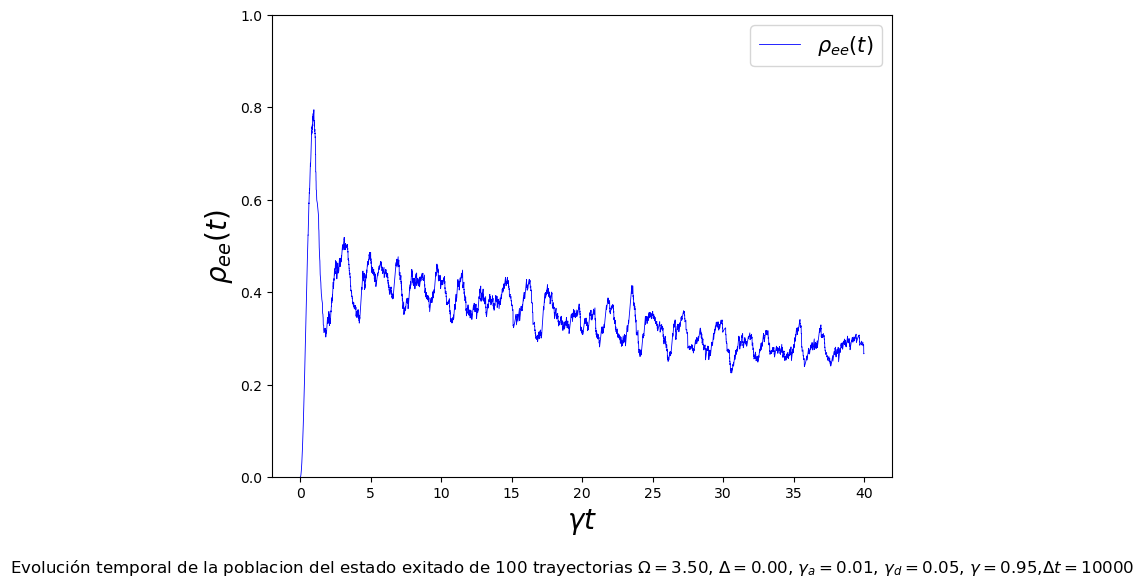

In [67]:
plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC50.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC100.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC50.expect[2], label =r'$\rho_{gg}(t)$', linestyle='-',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,200)
plt.ylim(0,1)
plt.legend(loc=1, prop={'size': 15})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de 100 trayectorias '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)


Text(0.5, -0.05, 'Evolución temporal de la poblacion del estado exitado de 500 trayectorias $\\Omega = 3.50$, $\\Delta = 0.00$, $\\gamma_a = 0.01$, $\\gamma_d = 0.05$, $\\gamma = 0.95$,$\\Delta t = 10000$')

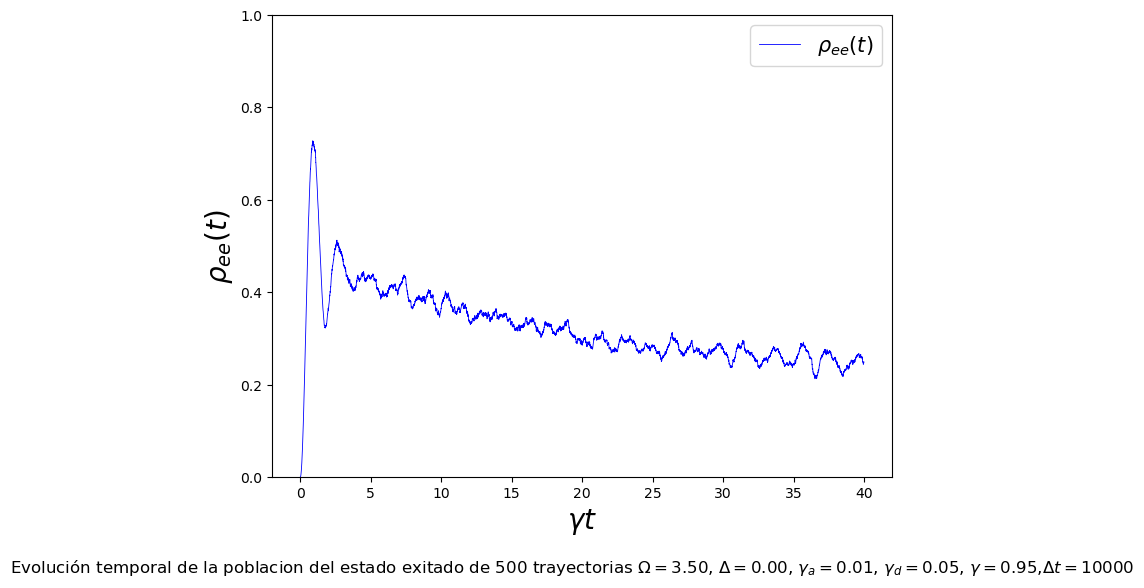

In [68]:
plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC50.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC500.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC50.expect[2], label =r'$\rho_{gg}(t)$', linestyle='-',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,200)
plt.ylim(0,1)
plt.legend(loc=1, prop={'size': 15})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de 500 trayectorias '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)


In [1]:
deltat=5000000
tlist = np.linspace(0,500000,deltat)
MC1 = mcsolve(H, psi0, tlist, collapse, expect_values, 1,
             options={'num_cpus': 6})  # Pasar las opciones como diccionario
#La funcion MC para resolver las trayectorias, H es el hamiltoniano, psi0 son las condiciones iniciales.
#tlist es el tiempo con delta t dependiendo de la funcion linspace, collapse los operadores de colapso, expect_values los 
#valores esperados y ntraj el numero de trayectorias.

NameError: name 'np' is not defined

In [ ]:
jump_times = MC1.col_times[0]  # tiempos de colapso
waiting_times = np.diff(jump_times)  # diferencias entre tiempos consecutivos



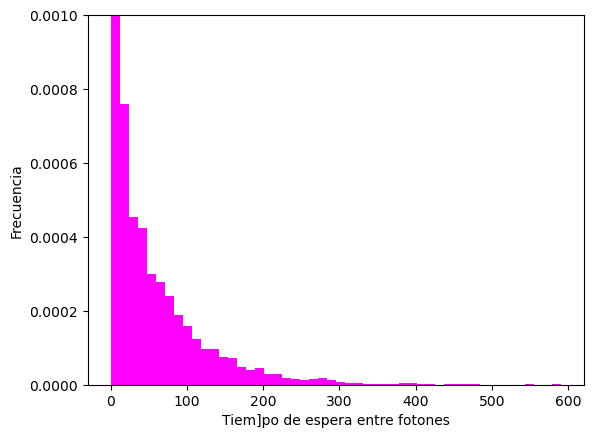

In [14]:
plt.hist(waiting_times, bins=50, density=True,color="magenta")
plt.xlabel("Tiem]po de espera entre fotones")
plt.ylabel("yt")
plt.ylim(0,0.001)
plt.show()